In [1]:
import setGPU

import tensorflow as tf

from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import sys

sys.path.append('../scripts')
from data_reading import *
from autoencoder_architectures import * 

setGPU: Setting GPU to: 0


/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3

### Experiment with public datasets, autoencoder architecture built using simple dense layers

In [2]:
""" create objects of datasets and load dataset"""
data_obj = public_datasets()
x_train, y_train, x_test, y_test = data_obj.load_cifar_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 3072) (50000, 1) (10000, 3072) (10000, 1)


### visualize a sample

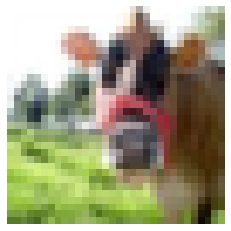

In [3]:
w = h = 32
plt.imshow(x_train[0].reshape(w, h, 3))
plt.axis('off')
plt.show()

In [4]:
""" create dense archs class object and choose arhitecture type """
latent_dim = 128
den_ae = dense_archs(x_train.shape[1])
autoencoder, encoder = den_ae.undercomp_ae_arch(latent_dim)
autoencoder.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 128)               393344    
_________________________________________________________________
sequential_1 (Sequential)    (None, 3072)              396288    
Total params: 789,632
Trainable params: 789,632
Non-trainable params: 0
_________________________________________________________________


In [5]:
""" start training here """
es_cb = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
history = autoencoder.fit(x_train, x_train, epochs=500, verbose=2, callbacks=[es_cb])

Epoch 1/500
50000/50000 - 6s - loss: 0.0342 - acc: 0.0029
Epoch 2/500
50000/50000 - 5s - loss: 0.0186 - acc: 0.0044
Epoch 3/500
50000/50000 - 5s - loss: 0.0152 - acc: 0.0057
Epoch 4/500
50000/50000 - 5s - loss: 0.0134 - acc: 0.0069
Epoch 5/500
50000/50000 - 5s - loss: 0.0123 - acc: 0.0081
Epoch 6/500
50000/50000 - 5s - loss: 0.0113 - acc: 0.0087
Epoch 7/500
50000/50000 - 5s - loss: 0.0106 - acc: 0.0094
Epoch 8/500
50000/50000 - 5s - loss: 0.0100 - acc: 0.0107
Epoch 9/500
50000/50000 - 5s - loss: 0.0095 - acc: 0.0116
Epoch 10/500
50000/50000 - 5s - loss: 0.0091 - acc: 0.0115
Epoch 11/500
50000/50000 - 5s - loss: 0.0087 - acc: 0.0122
Epoch 12/500
50000/50000 - 5s - loss: 0.0084 - acc: 0.0133
Epoch 13/500
50000/50000 - 5s - loss: 0.0081 - acc: 0.0134
Epoch 14/500
50000/50000 - 5s - loss: 0.0079 - acc: 0.0143
Epoch 15/500
50000/50000 - 5s - loss: 0.0077 - acc: 0.0148
Epoch 16/500
50000/50000 - 5s - loss: 0.0075 - acc: 0.0157
Epoch 17/500
50000/50000 - 5s - loss: 0.0074 - acc: 0.0154
Epoch 

In [6]:
""" plot model history """
def plot_history(history, metrics):
    plt.subplot(1, 2, 1)
    plt.plot(history.history[metrics])
    plt.title('Model accuracy'), plt.ylabel('accuracy'), plt.xlabel('epoch')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.title('Model loss'), plt.ylabel('loss'), plt.xlabel('epoch')
    plt.tight_layout()

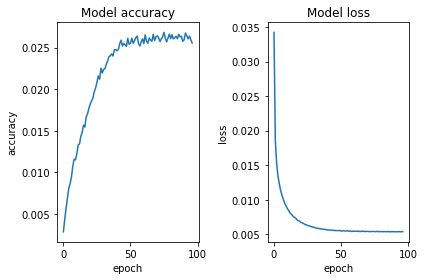

In [7]:
plot_history(history, 'acc')

In [8]:
latent_codings = encoder.predict(x_test)
print(latent_codings.shape)
recont_codings = autoencoder.predict(x_test)
print(recont_codings.shape)

(10000, 128)
(10000, 3072)


In [7]:
def display_original_reconstructed_images(n, images, predictions):
    plt.figure(figsize=(24,4))
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        if i == 0:
            plt.title('original_images', fontsize=18)
        plt.imshow(images[i].reshape(32, 32, 3), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        ax = plt.subplot(2, n, i+1+n)
        if i == 0:
            plt.title('reconstructed_images', fontsize=18)
        plt.imshow(predictions[i].reshape(32, 32, 3), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


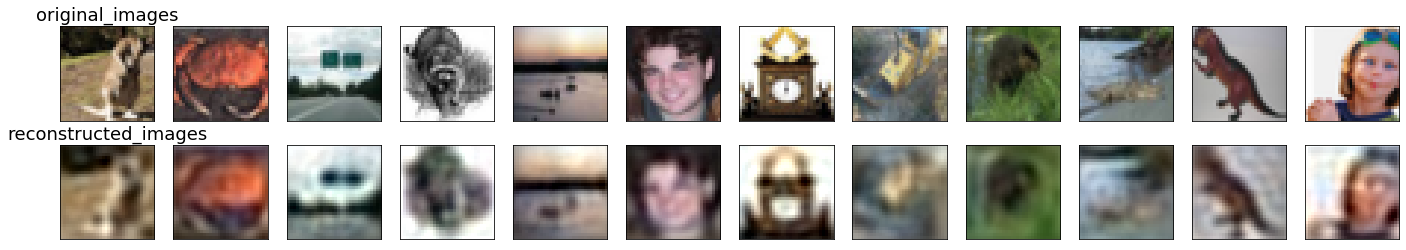

In [10]:
num_images = 12
original_images = []
reconstructed_images = []
for ind in range(num_images):
    rInd = np.random.randint(0, x_test.shape[0]-1)
    original_images.append((x_test[rInd]*255).astype(np.uint8))
    reconstructed_images.append(recont_codings[rInd])
    
display_original_reconstructed_images(num_images, original_images, reconstructed_images)

In [8]:
def display_encoder_embeddings(images, enw, enh):
    print(images.shape)
    n = 10
    plt.figure(figsize=(20, 8))
    for i in range(n):
        ax = plt.subplot(1, n, i+1)
        plt.imshow(images[i].reshape(enw, enh).T, cmap='gray') # 3 layer network
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

(100, 128)


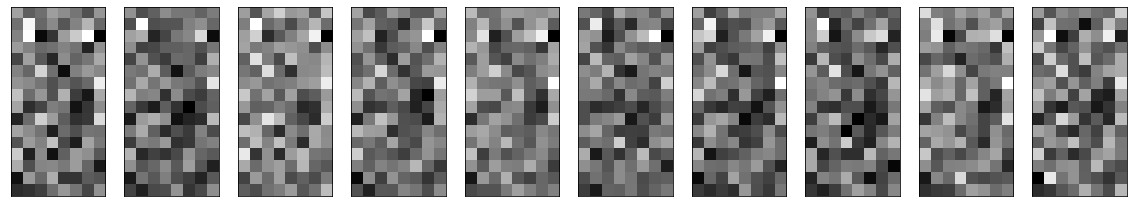

In [12]:
display_encoder_embeddings(latent_codings[:100], 8, 16)

In [13]:
tsne_1 = TSNE()
x_test_2d = tsne_1.fit_transform(latent_codings)
x_test_2d = (x_test_2d - x_test_2d.min()) /(x_test_2d.max() - x_test_2d.min())

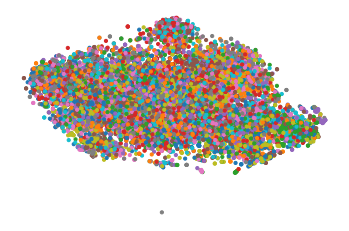

In [14]:
plt.scatter(x_test_2d[:, 0], x_test_2d[:, 1], c = y_test.squeeze(), s=10, cmap="tab10")
plt.axis("off")
plt.show()

In [15]:
IMAGES_PATH='../../outputs/dense_arch_results'
if not os.path.exists(IMAGES_PATH):
    os.makedirs(IMAGES_PATH)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [16]:
def visualize_tsne(x_2d, y_test, x_test):
    plt.figure(figsize=(10, 8))
    cmap = plt.cm.tab10
    plt.scatter(x_2d[:, 0], x_2d[:, 1], c = y_test.squeeze(), s=10, cmap=cmap)
    image_positions = np.array([[1., 1.]])
    for index, position in enumerate(x_2d):
        dist = np.sum((position - image_positions) ** 2, axis=1)
        if np.min(dist) > 0.02: # if far enough from other images
            image_positions = np.r_[image_positions, [position]]
            imagebox = mpl.offsetbox.AnnotationBbox(
                mpl.offsetbox.OffsetImage(x_test[index].reshape(32, 32, 3), cmap="binary"),
                position, bboxprops={"edgecolor": cmap(y_test.squeeze()[index]), "lw": 2})
            plt.gca().add_artist(imagebox)
    plt.axis("off")
    save_fig("fashion_mnist_visualization_plot")
    plt.show()

Saving figure fashion_mnist_visualization_plot


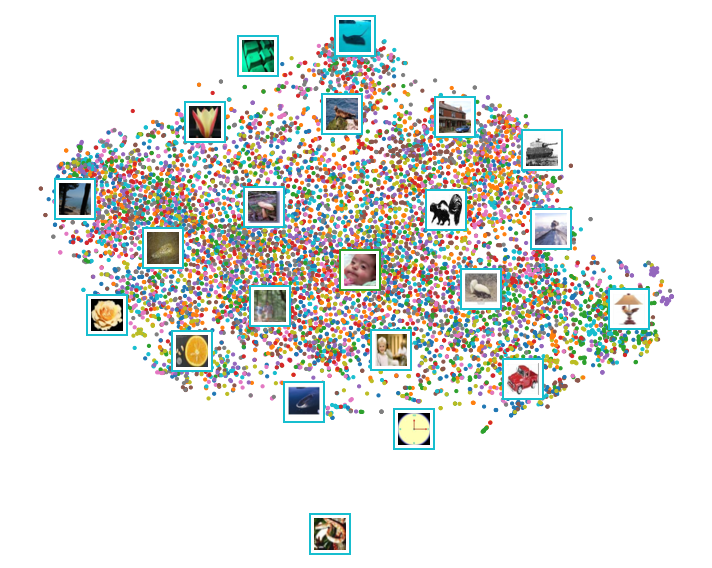

In [17]:
visualize_tsne(x_test_2d, y_test, x_test)

### Experimenting with a stacked/deep autoencoder

In [2]:
ndata_obj = public_datasets(False)
x_train_full, y_train_full, xr_test, yr_test = ndata_obj.load_cifar_data()

xr_train = x_train_full[:-5000]
xr_valid = x_train_full[-5000:]

yr_train = y_train_full[:-5000]
yr_valid = y_train_full[-5000:]

print(x_train_full.shape, xr_train.shape, yr_train.shape, xr_valid.shape, xr_train.shape[1:])

(50000, 32, 32, 3) (45000, 32, 32, 3) (45000, 1) (5000, 32, 32, 3) (32, 32, 3)


In [3]:
narch_obj = dense_archs(xr_train.shape[1:])

In [19]:
narch_obj = dense_archs(xr_train.shape[1:])
ae, encoder = narch_obj.stacked_ae_arch()
print(ae.summary())
es_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = ae.fit(xr_train, xr_train, epochs=500, validation_data=(xr_valid, xr_valid), verbose=2, callbacks=[es_cb])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 64)                401600    
_________________________________________________________________
sequential_4 (Sequential)    (None, 32, 32, 3)         404608    
Total params: 806,208
Trainable params: 806,208
Non-trainable params: 0
_________________________________________________________________
None
Train on 45000 samples, validate on 5000 samples
Epoch 1/500
45000/45000 - 9s - loss: 0.6212 - __rounded_accuracy: 0.7445 - val_loss: 0.5929 - val___rounded_accuracy: 0.8084
Epoch 2/500
45000/45000 - 9s - loss: 0.5891 - __rounded_accuracy: 0.8142 - val_loss: 0.5824 - val___rounded_accuracy: 0.8310
Epoch 3/500
45000/45000 - 9s - loss: 0.5790 - __rounded_accuracy: 0.8349 - val_loss: 0.5773 - val___rounded_accu

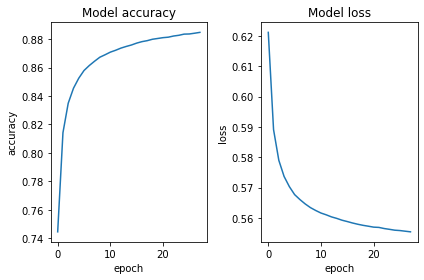

In [20]:
plot_history(history, "__rounded_accuracy")

In [21]:
latent_codings = encoder.predict(xr_test)
print(latent_codings.shape)
recont_codings = ae.predict(xr_test)
print(recont_codings.shape)

(10000, 64)
(10000, 32, 32, 3)


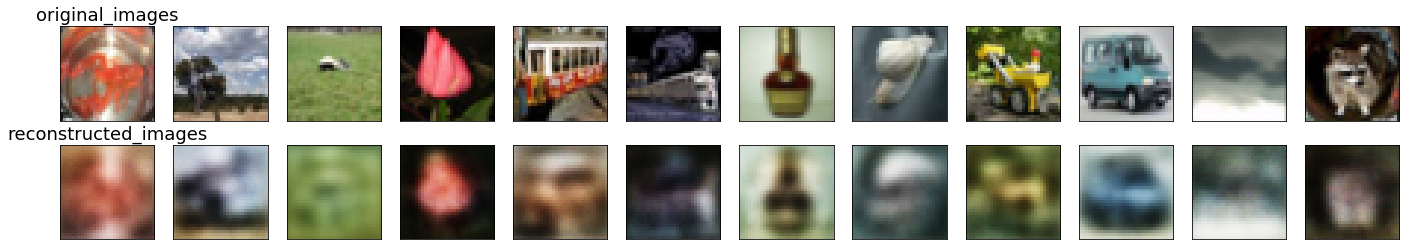

In [22]:
num_images = 12
original_images = []
reconstructed_images = []
for ind in range(num_images):
    rInd = np.random.randint(0, xr_test.shape[0]-1)
    original_images.append(xr_test[rInd])
    reconstructed_images.append(recont_codings[rInd])
    
display_original_reconstructed_images(num_images, original_images, reconstructed_images)

(100, 64)


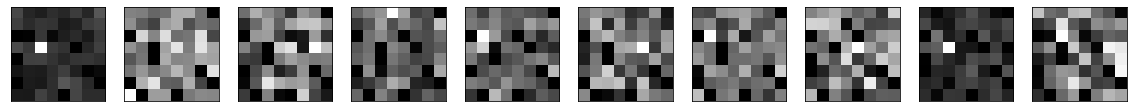

In [23]:
display_encoder_embeddings(latent_codings[:100], 8, 8)

In [24]:
x_compressed = encoder.predict(xr_valid)
tsne = TSNE()
xr_valid_2d = tsne.fit_transform(x_compressed)
xr_valid_2d = (xr_valid_2d - xr_valid_2d.min()) /(xr_valid_2d.max() - xr_valid_2d.min())

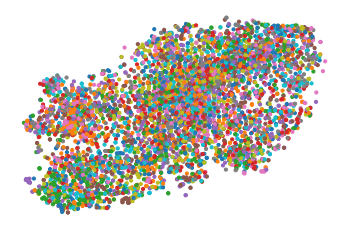

In [25]:
plt.scatter(xr_valid_2d[:, 0], xr_valid_2d[:, 1], c = yr_valid.squeeze(), s=10, cmap="tab10")
plt.axis("off")
plt.show()

Saving figure fashion_mnist_visualization_plot


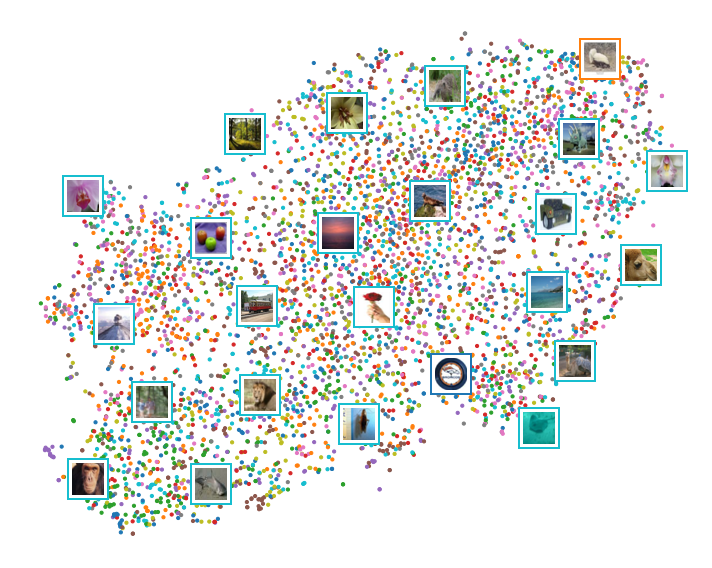

In [26]:
visualize_tsne(xr_valid_2d, yr_valid, xr_test)

In [4]:
deep_ae, deep_encoder = narch_obj.deep_dense_net()
deep_ae.summary()

es_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
rlr_cb = tf.keras.callbacks.ReduceLROnPlateau(mointor='val_loss', factor=0.001, patience=10)
history = deep_ae.fit(xr_train, xr_train, epochs=500, validation_data=(xr_valid, xr_valid), verbose=2, callbacks=[es_cb, rlr_cb])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         multiple                  0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               786688    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_______

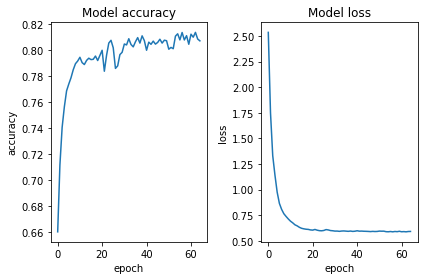

In [10]:
plot_history(history, "__rounded_accuracy")